In [44]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import *

In [45]:
 #Defining the Observables
q = Symbol('q')
omega = Symbol('\Omega')
sigma = Symbol('\Sigma')
sigmatot = Symbol('Sigma_tot')
sigmasfr = Symbol('Sigma_SFR')
T = Symbol('T')


#Defining the Constants
calpha = Symbol('C_alpha')
gamma = Symbol('gamma')
boltz = Symbol('k_B')
mu = Symbol('mu')
mh = Symbol('m_H')
G = Symbol('G')
xio = Symbol('xi_0')
delta = Symbol('\delta')
mstar = Symbol('m_*')
cl = Symbol('C_l')
kappa = Symbol('kappa')

#Defining the general parameters
u = Symbol('u')
tau = Symbol('tau')
l = Symbol('l')
mach = Symbol('M')


#Defining the expressions
cs = (gamma*boltz*T/(mu*mh))**Rational(1/2)
h = (u**2 + 2*cs**2)/(3*pi*G*sigmatot)
nu = (delta*sigmasfr)/(2*h*mstar)
alphak = calpha*tau**2*(u**2)*omega/h
# Ralpha = alphak*h/eta
# Romega = -q*omega*h**2/eta


sigmatot


Sigma_tot

## Model 1

### Evaluating expressions

In [46]:
l = cl*h
a = [(u,mach*cs)]
h = simplify(h.subs(a))
h

T*gamma*k_B*(M**2 + 2)/(3*pi*G*Sigma_tot*m_H*mu)

In [47]:
l= simplify(l.subs(a))
l

C_l*T*gamma*k_B*(M**2 + 2)/(3*pi*G*Sigma_tot*m_H*mu)

In [48]:
u = simplify(u.subs(a))
u

M*sqrt(T*gamma*k_B/(m_H*mu))

In [49]:
tau = l/u
tau = simplify(tau.subs(a))
tau

C_l*sqrt(T*gamma*k_B/(m_H*mu))*(M**2 + 2)/(3*pi*G*M*Sigma_tot)

In [50]:
rho = sigma/(2*h)
Beq = u*(4*pi*rho)**Rational(1/2)
biso = (Beq*(xio**(1/2)))/Max(1,mach)
biso = simplify(biso.subs(a))
biso = biso.powsimp(force = True)
biso

sqrt(6)*pi*M*xi_0**0.5*sqrt(G*Sigma_tot*\Sigma/(M**2 + 2))/Max(1, M)

In [51]:
bani = biso*(Rational(2/3)*q*omega)**Rational(1/2)*(tau**Rational(1/2))

bani = simplify(bani.subs(a))
bani = bani.powsimp(force = True)
bani

3*sqrt(667199944795629)*sqrt(pi)*M*xi_0**0.5*sqrt(C_l*\Omega*\Sigma*q*sqrt(T*gamma*k_B/(m_H*mu))/M)/(67108864*Max(1, M))

In [52]:
eta = tau*(u**2)/3
Rk = Symbol('R_k')
Dk = -(9*calpha*q*(h**2)*(omega**2))/u**2
Dc = -(pi**5)/32
rho = sigma/(2*h)
Beq = (4*pi*rho)**Rational(1/2)*u
Bbar = (pi*Beq*l*(Rk*(Dk/Dc))**Rational(1/2))/h

Bbar = simplify(Bbar.subs(a))
Bbar = Bbar.powsimp(force = True)
Bbar


8*sqrt(3)*C_l*M*sqrt(C_alpha*R_k*T*\Omega**2*\Sigma*gamma*k_B*q*(M**2 + 2)/(G*M**2*Sigma_tot*m_H*mu))/pi**(3/2)

In [53]:
tanpb = -((pi**2)*tau*(u**2))/(12*q*omega*(h**2))
tanpb = simplify(tanpb.subs(a))
tanpb = tanpb.subs([(tau,tau),(l,l)])
tanpb = simplify(tanpb)
tanpb

-pi**3*C_l*G*M*Sigma_tot*m_H*mu*sqrt(T*gamma*k_B/(m_H*mu))/(4*T*\Omega*gamma*k_B*q*(M**2 + 2))

The power to which the observable Sigma_tot is raised is: -1/2


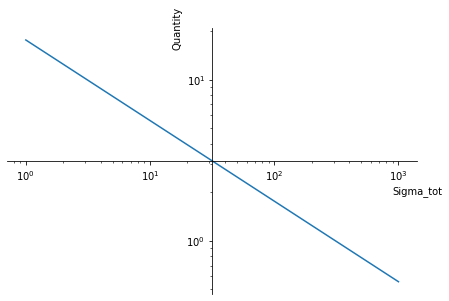

The power to which the observable \Sigma is raised is: 1/2


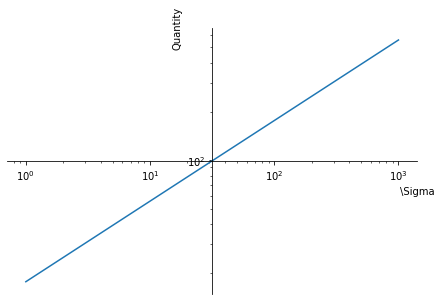

The power to which the observable Sigma_SFR is raised is: 0


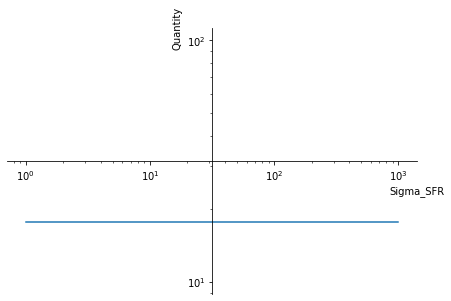

The power to which the observable \Omega is raised is: 1


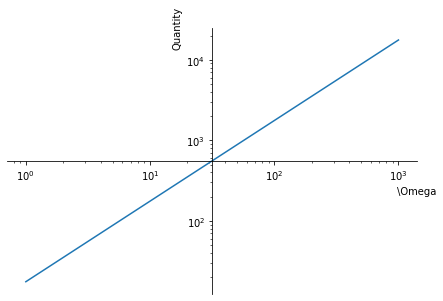

The power to which the observable q is raised is: 1/2


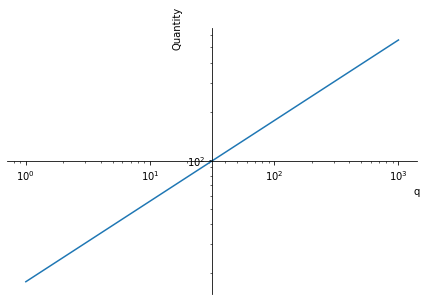

The power to which the observable T is raised is: 1/2


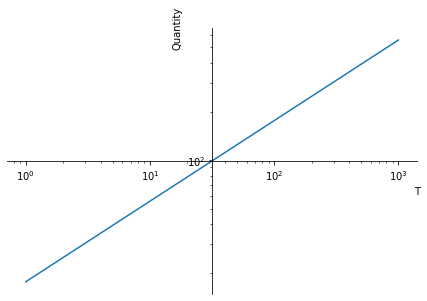

The scaling relation is 


sqrt(T)*\Omega*sqrt(\Sigma)*sqrt(q)/sqrt(Sigma_tot)

In [54]:
from sympy.plotting import plot3d, plot
const = [(gamma,1),(boltz,1),(mh,2),(mu,1),(mach,sqrt(2)),(G,1),(cl,5),(xio,0.4),(kappa,1),(calpha,1), (Rk,1)]
variables = [(sigmatot,1), (sigma,1),(sigmasfr,1) , (omega,1), (q,1), (T,1)]

#quantity to be plotted
quan = Bbar
#observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
#powers for scaling relations
powe = []
#plotting the scaling relations
for obs in observ:
    variables = [(sigmatot,1), (sigma,1),(sigmasfr,1) , (omega,1), (q,1), (T,1)]
    variables.remove((obs,1))
    final = const + variables
    z = quan.subs(final)
    powe.append(diff(log(z),obs)*obs)
    print('The power to which the observable {} is raised is: {}'.format(str(obs), diff(log(z),obs)*obs))
    p = plot(z, (obs, 1, 1000), xscale = 'log', yscale = 'log',xlabel = obs, ylabel = 'Quantity')
    p.show
    
#verifying scaling relation
scaling = np.power(observ, powe)
relation = 1
for i in scaling:
    relation *= i

print('The scaling relation is ')
relation


In [27]:
names =  ['M31', 'M33', 'M51', 'M81', 'NGC253', 'NGC1566', 'NGC6946', 'IC342']

In [55]:
omegadat = [38.4, 24.9, 46.7, 31.7, 50.9, 62.1, 52.4, 38.2, 48.1, 28.1 ]
qdat = [0.75, 0.84, 0.87, 1.24, 0.97, 1.00, 0.95, 0.96, 0.86, 1.05]
sigmatotdat = np.array([1.47, 9.43, 8.98, 3.33, 3.28, 3.13, 4.31, 9.69, 6.30, 6.41])
nan = 'nodata'
sigmasfrdat = [0.443, 3.99, 18.0, nan, 35.1, nan, nan, nan, 20.2, nan]

In [56]:
pbdat = np.array([-13, -41, -22, -21, -25, -23, -17, -20, -27, -21])
errpb = np.array([4,2,4,7,5,2,1,5,2,2])
Bbardat = [4.8,0.3,2.5,nan,4.4,1.9,0.8,nan,nan]
tanpbdat = np.tan(pb)

In [57]:
tanpb

-pi**3*C_l*G*M*Sigma_tot*m_H*mu*sqrt(T*gamma*k_B/(m_H*mu))/(4*T*\Omega*gamma*k_B*q*(M**2 + 2))

In [68]:

from sympy.plotting import plot3d, plot
const = [(gamma,1.5),(boltz,1.38e-23),(mh,1),(mu,1),(mach,1),(G,6.67e-11),(cl,1),(xio,0.4),(kappa,1),(calpha,1), (Rk,1)]
exp = tanpb.subs(const)
variables = [(sigmatot,1), (sigma,20**(1/1.4)),(sigmasfr,20) , (omega,50), (q,1), (T,2222477.594)]

#quantity to be plotted
quan = tanpb
#observable to be varied
observ = [variables[i][0] for i in range(len(variables))]
#plotting the scaling relations
obs = sigmatot

variables.remove((obs,1))
final = const + variables
z = quan.subs(final)
z

-1.63896890901974e-5*pi**3*Sigma_tot

In [69]:
scalreldata = []
for s in sigmatotdat:
    scalreldata.append(z.evalf(subs={sigmatot:s}))
scalreldata = np.array(scalreldata)
scalreldata

array([-0.000747029354913085, -0.00479216790260571, -0.00456348544702007,
       -0.00169225017133372, -0.00166684100960198, -0.00159061352440677,
       -0.00219026974127578, -0.00492429554361074, -0.00320155437819893,
       -0.00325745453400876], dtype=object)

C:\Users\WS7\AppData\Local\Temp/ipykernel_13584/1955858082.py:4: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='major', color= [.6,.6,.6], linestyle='-')
C:\Users\WS7\AppData\Local\Temp/ipykernel_13584/1955858082.py:5: MatplotlibDeprecationWarning: The 'b' parameter of grid() has been renamed 'visible' since Matplotlib 3.5; support for the old name will be dropped two minor releases later.
  plt.grid(b=True, which='minor', color= [.6,.6,.6], linestyle=':')


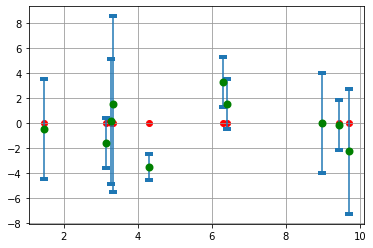

In [70]:
plt.errorbar(sigmatotdat, tanpbdat, yerr=errpb, fmt = 'o', mfc='red',
         mec='green', ms=4, mew=4, capsize = 4)
plt.scatter(sigmatotdat, scalreldata, c = 'r')
plt.grid(b=True, which='major', color= [.6,.6,.6], linestyle='-')
plt.grid(b=True, which='minor', color= [.6,.6,.6], linestyle=':')